# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Checking-regression" data-toc-modified-id="Checking-regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Checking regression</a></div><div class="lev2 toc-item"><a href="#Checking-functions" data-toc-modified-id="Checking-functions-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Checking functions</a></div><div class="lev3 toc-item"><a href="#Generate-boxes" data-toc-modified-id="Generate-boxes-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Generate boxes</a></div><div class="lev3 toc-item"><a href="#Generate-rotated-boxes" data-toc-modified-id="Generate-rotated-boxes-112"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Generate rotated boxes</a></div><div class="lev3 toc-item"><a href="#Generate-test-dataset" data-toc-modified-id="Generate-test-dataset-113"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Generate test dataset</a></div><div class="lev3 toc-item"><a href="#Rotated-boxes-test-set" data-toc-modified-id="Rotated-boxes-test-set-114"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Rotated boxes test set</a></div><div class="lev3 toc-item"><a href="#Conv-net-definitions" data-toc-modified-id="Conv-net-definitions-115"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Conv net definitions</a></div><div class="lev3 toc-item"><a href="#Generate-Default-boxes" data-toc-modified-id="Generate-Default-boxes-116"><span class="toc-item-num">1.1.6&nbsp;&nbsp;</span>Generate Default boxes</a></div><div class="lev3 toc-item"><a href="#Center-to-coords" data-toc-modified-id="Center-to-coords-117"><span class="toc-item-num">1.1.7&nbsp;&nbsp;</span>Center to coords</a></div><div class="lev3 toc-item"><a href="#Get-prediction-boxes" data-toc-modified-id="Get-prediction-boxes-118"><span class="toc-item-num">1.1.8&nbsp;&nbsp;</span>Get prediction boxes</a></div><div class="lev3 toc-item"><a href="#Draw-all-boxes" data-toc-modified-id="Draw-all-boxes-119"><span class="toc-item-num">1.1.9&nbsp;&nbsp;</span>Draw all boxes</a></div><div class="lev3 toc-item"><a href="#Normalize-shifts" data-toc-modified-id="Normalize-shifts-1110"><span class="toc-item-num">1.1.10&nbsp;&nbsp;</span>Normalize shifts</a></div><div class="lev3 toc-item"><a href="#Regression-loss" data-toc-modified-id="Regression-loss-1111"><span class="toc-item-num">1.1.11&nbsp;&nbsp;</span>Regression loss</a></div><div class="lev3 toc-item"><a href="#Get-aspect-ratio" data-toc-modified-id="Get-aspect-ratio-1112"><span class="toc-item-num">1.1.12&nbsp;&nbsp;</span>Get aspect ratio</a></div><div class="lev3 toc-item"><a href="#Eveyrthing-connected" data-toc-modified-id="Eveyrthing-connected-1113"><span class="toc-item-num">1.1.13&nbsp;&nbsp;</span>Eveyrthing connected</a></div><div class="lev2 toc-item"><a href="#Experiments" data-toc-modified-id="Experiments-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Experiments</a></div>

# Checking regression 

The strategy will be to check regression in x and y and see how that works out when you combine it. Clearly something must be amiss. So the list of things to do is the following - 


1) check regression in x 

2) check regression in y 

3) check regression when you combine both

4) For all of this you need to check each function to make sure that it is doing what its supposed to do




## Checking functions 

### Generate boxes

First attempt chose a static box to see what is going on,  you will replicate the code for random boxes

In [1]:
import chainer
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches, transforms 
import random 
from chainer.functions import log, hstack, huber_loss
from chainer import cuda 
import cupy 
# %matplotlib notebook
def get_single_image(pos_r, pos_c, height, width, angle  ): 
    
    image = np.zeros((1,3,128,128), dtype=np.float32)

    gts = []

    for i in range(1):
        # Choose random coordinate, this can also be run in a loop
        width = width
        height =height
        pos_r =pos_r
        pos_c =pos_c
        image[0,:,pos_r-int(height/2):pos_r+int(height/2),pos_c-int(width/2):pos_c+int(width/2)]=1
        #print(pos_r, pos_c)

        cx = pos_c #+ width/2.0
        cy = pos_r #+ #height/2.0

        box = [cx, cy, width, height,angle, 1, 0]

        gts.append(box)

    # Create ground truth object
    gts2 = chainer.Variable(cuda.to_gpu(np.array(gts, dtype=np.float32))) 
    
    return gts2,image 


gt, img  = get_single_image(50,50, 50,20, 0.0)
# for i in range(1):
    # Initialize the image
    
    # Visualize the entire thing
#     img_np = np.array(img)
#     plt.imshow(img[0,0,:,:])
#     plt.show()

In [2]:
print('ground truth box coordinates: ' ,gt,'gt shape :' ,gt.shape)
print('-----------------------------------------------')
print('Image shape', img.shape)


ground truth box coordinates:  variable([[ 50.  50.  20.  50.   0.   1.   0.]]) gt shape : (1, 7)
-----------------------------------------------
Image shape (1, 3, 128, 128)


In [3]:
img

array([[[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]]], dtype=float32)

### Generate rotated boxes

In [4]:
# checking how to generate rotated rectangles 
from PIL import Image
from PIL import ImageDraw
import math

def rotate_point(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)

    return qx, qy

angle= np.deg2rad(96)
img_size = img.shape[2]
centerx= 60
centery = 60 
width =30 
height= 50 



def rotated_generated_image(centerx, centery, width, height, angle, plot_image=False): 
    """
     Input- 
     
     img_size : (2,2) array -size of the input image to draw on 
     
     Output- 
     box      : 1*7 numpy array [centerx, centery, width, height, angle,1,0]
     
    """
  
    img_size= 128
    
    angle = angle
    points =np.array([[centerx-(width/2),centery-(height/2)],
            [centerx-(width/2),centery+(height/2)], 
            [centerx+(width/2),centery+(height/2)], 
             [centerx+(width/2),centery-(height/2)]])
    center = [centerx, centery]
    all_rotated_points = [ rotate_point(center,points[x,:], angle) for x in range(0,4)]    

    img = Image.new('RGB', (img_size, img_size), (0, 0, 0))
    draw = ImageDraw.Draw(img, 'RGBA')
    draw.polygon(all_rotated_points, (255, 0, 0))
    img_numpy = np.array(img, dtype=np.float32)
    box = chainer.Variable(cuda.to_gpu(np.array([centerx, centery, width, height, angle, 1, 0], dtype=np.float32)))       
    box =chainer.functions.reshape(box,(1,7))
  
    
    if plot_image==True: 
        plt.figure()
        plt.imshow(img_numpy[:,:,0])
        plt.show()
    
    for i in range(3): 
        single_channel = img_numpy[:,:,i]
    
        if i==0:     
            tr_image = np.reshape(single_channel,[1,1,single_channel.shape[0], single_channel.shape[1]], order='C')
        else: 
            tr_image =np.hstack((tr_image,  np.reshape(single_channel,[1,1,single_channel.shape[0], single_channel.shape[1]], order='C')))
        
    
    return box, tr_image


rot_gt,rot_img= rotated_generated_image(centerx, centery, width, height, angle,plot_image=False )    
print('ground truth box coordinates: ' ,rot_gt,'gt shape :' ,rot_gt.shape)
print('-----------------------------------------------')
print('Image shape', rot_img.shape)



ground truth box coordinates:  variable([[ 60.          60.          30.          50.           1.67551613
             1.           0.        ]]) gt shape : (1, 7)
-----------------------------------------------
Image shape (1, 3, 128, 128)


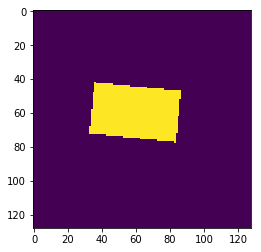

In [5]:

        
plt.figure()
plt.imshow(rot_img[0,0,:,:])
plt.show()


### Generate test dataset

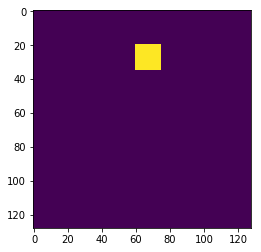

In [6]:
def generate_test_set():
    
    image_sizes = [10,15,20,25,30,35,40,45,50,55,60]
    locx =[20,20,30,30,40,40,50, 60,60,60,60]
    locy = [60,60,30,30,40,60,50, 45,45,50,50]
    test_gts = []
    imgs = []
    
    for i in range(len(locx)): 

        image = np.zeros((1,3,128,128), dtype=np.float32)
        # Choose random coordinate, this can also be run in a loop
        width = image_sizes[i]
        height =image_sizes[i]
        pos_r =locx[i]
        pos_c =locy[i]
        image[0,:,pos_r:pos_r+height,pos_c:pos_c+width]=1
        #print(pos_r, pos_c)

        cx = pos_c #+ width/2.0
        cy = pos_r #- height/2.0

        box = [cx, cy, width, height, 1, 0]

        test_gts.append(box)
        imgs.append(image)
    # Create ground truth object
    test_gts2 = chainer.Variable(np.array(test_gts, dtype=np.float32))
    return test_gts2, imgs 

test_gts, test_imgs = generate_test_set()
test_gts

img_test = test_imgs[1]

plt.imshow(img_test[0,0,:,:])


plt.show()


### Rotated boxes test set

In [7]:
def get_test_results(angles, widths, positions, model,select_index,def_boxes): 
    test_pred_boxes_all =[]
    test_gt_all= []
    test_def_boxes =def_boxes 
    
    for i in range(len(angles)): 
            angle =np.deg2rad(angles[i])
            width = widths[i]
            height = heights[i]
            center_x, center_y = positions[i]
            test_gt, rotated_test_image= rotated_generated_image(center_x, center_y, width, height, angle, plot_image=False)
            gpu_test_image =chainer.Variable(cuda.to_gpu(rotated_test_image))
            test_shifts  = get_shifts(boxnet(gpu_test_image))    
            test_pred_boxes = get_pred_boxes(test_shifts, test_def_boxes)
            test_pred_boxes_all.append(test_pred_boxes)    
            test_gt_all.append(test_gt)
            print('Angle- ', np.rad2deg(angle), 'Width- ', width, 'Height- ', height, ' Position- ', center_x, center_y)
            draw_pred_boxes(test_pred_boxes,test_def_boxes, rotated_test_image)
            
            
    return test_pred_boxes_all,test_gt_all



### Conv net definitions 

In [8]:
from chainer import Chain
import chainer
import chainer.functions as F
import chainer.links as L

class ConvNet(Chain):
    def __init__(self):
        super(ConvNet, self).__init__(
            l1=L.Convolution2D(None,64,ksize=(3,3),stride=1,pad=1),
            b1 =L.BatchNormalization(64),
            
            l2=L.Convolution2D(64,64,ksize=(3,3),stride=1,pad=1),
            b2 =L.BatchNormalization(64),            
            
            l3=L.DilatedConvolution2D(64,64,ksize=(5,5),stride=1,pad=1),
            
            l4=L.Convolution2D(64,64,ksize=(3,3),stride=1,pad=1),
            b4 =L.BatchNormalization(64),
            
            l5=L.Convolution2D(64,128,ksize=(3,3),stride=1,pad=1),    
            b5 =L.BatchNormalization(128),
            
            l6=L.DilatedConvolution2D(128,256,ksize=(7,7),stride=1,pad=1),
            b6 =L.BatchNormalization(256),
            
            l7=L.Convolution2D(256,256,ksize=(3,3),stride=1,pad=1),
            b7 =L.BatchNormalization(256),
            
            l8=L.Convolution2D(256,256,ksize=(3,3),stride=1,pad=1),
            b8 =L.BatchNormalization(256),
            
        )
        
        
    def __call__(self, x):
        h = F.relu((self.l1(x)))
        h= F.relu((self.l2(h)))
       
        
        h = F.relu(self.l3(h))
#         h4 = F.max_pooling_2d(h3, 2)
        
        h = F.relu((self.l4(h)))
        h= F.relu((self.l5(h)))
        
        h = F.relu((self.l6(h)))
        h = F.relu((self.l7(h)))
       
        
        
        return self.l8(F.sigmoid(h))
    

In [9]:
class BoxNet(Chain):
    def __init__(self, predictor):
        super(BoxNet, self).__init__(
            l1=L.Convolution2D(None,7,ksize=(3,3),stride=1,pad=1)
        )
        self.predictor = predictor
        
    def __call__(self, x):
        h1 = self.l1(self.predictor(x))
        return h1
convnet = ConvNet()   
convnet.to_gpu(0)
boxnet = BoxNet(convnet)
boxnet.to_gpu(0)

img_gpu= chainer.Variable(cuda.to_gpu(img))


fm = convnet(img_gpu)
shifts_all = boxnet(img_gpu)

select_index  = 64
shifts= shifts_all[:,:,select_index,select_index]
shifts =F.reshape(shifts,[1,7,1,1])
shifts_all.shape


(1, 7, 122, 122)

In [10]:
print('shifts all shape :', shifts_all.shape,  ' \n shifts shape :', shifts.shape)
print('------------------------------------------')
print('shifts value :', shifts[0])

shifts all shape : (1, 7, 122, 122)  
 shifts shape : (1, 7, 1, 1)
------------------------------------------
shifts value : variable([[[ 0.18286584]]

          [[ 0.12371329]]

          [[ 0.40683699]]

          [[-0.35185733]]

          [[-0.38958791]]

          [[ 0.33083138]]

          [[ 0.10097257]]])


### Generate Default boxes

In [11]:
def defaultgen(I, F, width, height,angle ):
    """
    Generates an array of default boxes: Chainer TESTED
    
    Args:
        I: Input image tensor (N,channels,rows,cols)
        F: Feature map tensor to generate default boxes for
        width: Width of the box
        height: Height of the box
        
    Returns:
        db: Default boxes tensor, flattened
    """
    scale = (I.shape[2] / F.shape[2])
    offset = np.ones((2,F.shape[2],F.shape[3]), dtype=np.float32)
    iterator = np.flip(np.indices((F.shape[2],F.shape[3])), axis=0).astype(np.float32)
    
    xys = offset * ((scale-1)/2) + iterator * scale
    xys = np.moveaxis(xys,0,2)
    ws = np.full((F.shape[2],F.shape[3],1), width, dtype=np.float32)
    hs = np.full((F.shape[2],F.shape[3],1), height,dtype=np.float32)
    class_scores = np.zeros((F.shape[2],F.shape[3],2), dtype=np.float32)
    angle = np.full((F.shape[2],F.shape[3],1), angle,dtype=np.float32)

    db = np.dstack([xys, ws, hs,angle, class_scores])
   
#     db = db[64,64,:]
#     db = db.reshape([1,1,6])
    db = cuda.to_gpu(db)
    return chainer.Variable(db.reshape((db.shape[0] * db.shape[1], 7)))


In [12]:
def_boxes = defaultgen(img,fm, 60,60, 0.0)
def_box_index =np.ravel_multi_index((select_index,select_index),(shifts_all.shape[2],shifts_all.shape[3]))
def_boxes = def_boxes[def_box_index,:]
def_boxes =def_boxes.reshape([1,1,7])
def_boxes = def_boxes[0]

print('def_boxes values:', def_boxes)
print('---------------------------------------')
print('print shape of def boxes :', def_boxes.shape)

def_boxes values: variable([[ 67.17212677  67.17212677  60.          60.           0.           0.
             0.        ]])
---------------------------------------
print shape of def boxes : (1, 7)


### Center to coords 

This function has been checked, seems correct, some examples below

In [13]:
def center_to_coords(box):
    """ 
    Converts bounding box from (cx, cy, w, h) format to (x1, y1, x2, y2) format
    
    Args:
        box: 7d numpy array
        
    Returns:
        box_transformed: Box in the second format
    
    """
    box_transformed = np.array([box[0]-box[2]/2.0, box[1]-box[3]/2.0, box[0]+box[2]/2.0, box[1]+box[3]/2.0, box[4], box[5], box[6]])
    return box_transformed



Checking center to coords...

In [14]:
center_to_coords(def_boxes[0])


array([variable(37.17212677001953), variable(37.17212677001953),
       variable(97.17212677001953), variable(97.17212677001953),
       variable(0.0), variable(0.0), variable(0.0)], dtype=object)

In [15]:
# some more checks 

box1= np.array([10,9, 3,3,0.5,0,0])
box2= np.array([90,15, 33,33,0,5, 0,0])

print(center_to_coords(box2), center_to_coords(box1)) 

[  73.5   -1.5  106.5   31.5    0.     5.     0. ] [  8.5   7.5  11.5  10.5   0.5   0.    0. ]


### Get prediction boxes 

This seems to be correct as well

In [16]:
def get_pred_boxes(shift_vals, default_boxes ): 
    """
    Get predicted boxes by combining shift values to default boxes
    Input: 

    shift_values : Shifts generated by the network  NDarray (None, Num of Default boxes, 4+num of classes)
    Default boxes  : Default boxes generated by the network NDarray (None, Num of Default boxes, 4+num of classes)

    Output: 

    Predicted boxes  : Predicted boxes, same shape as default boxes  NDarray (None, Num of Default boxes, 4+num of classes)

    """
    
    shift_val_shape= default_boxes.shape
    shift_vals= F.swapaxes(shift_vals,1,3)
    shift_vals= F.reshape(shift_vals,shift_val_shape)
    
    shifts = shift_vals 
    def_boxes= default_boxes
    

    cx_pred = (shifts[:,0]*def_boxes[:,2])+def_boxes[:,0]
    cy_pred = (shifts[:,1]*def_boxes[:,3])+def_boxes[:,1]
    H_pred = F.exp(shifts[:,3])*def_boxes[:,3]
    W_pred = F.exp(shifts[:,2])*def_boxes[:,2]
    
    class1 = shifts[:,5]
    class2 = shifts[:,6]
    
    angle_pred  =shifts[:,4]
    
    pred_boxes = F.vstack((cx_pred,cy_pred,W_pred,H_pred,angle_pred, class1, class2))
    pred_boxes = F.transpose(pred_boxes)
    
    return  pred_boxes 

In [17]:
pred_boxes= get_pred_boxes(shifts, def_boxes)
print('prediction box coordinates :', pred_boxes)

prediction box coordinates : variable([[ 78.14407349  74.59492493  90.12355804  42.20282364  -0.38958791
             0.33083138   0.10097257]])


In [18]:
shifts

variable([[[[ 0.18286584]],

           [[ 0.12371329]],

           [[ 0.40683699]],

           [[-0.35185733]],

           [[-0.38958791]],

           [[ 0.33083138]],

           [[ 0.10097257]]]])

In [19]:
def_boxes

variable([[ 67.17212677,  67.17212677,  60.        ,  60.        ,
             0.        ,   0.        ,   0.        ]])

### Draw all boxes

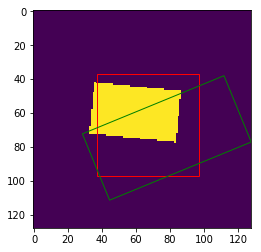

In [20]:

def draw_pred_boxes(prediction_boxes,default_boxes, img): 
    """Draw predicted boxes on the original image """
    img = img
    plt.figure()
    ax = plt.axes()
    pbox =prediction_boxes


    for box in default_boxes:
        box = center_to_coords(box.data)
        ax.imshow(img[0,0,:,:])
        p = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], fill=False, color = 'red')
        ax.add_patch(p)
    
    for box in pbox:
        box2= cuda.to_cpu(box.data)
        cbox = center_to_coords(box2)
        
#         ax.imshow(img[0,0,:,:])
#         print(box)
        q = patches.Rectangle((cbox[0], cbox[1]), cbox[2]-cbox[0], cbox[3]-cbox[1], fill=False, color = 'green')
        t = transforms.Affine2D().rotate_around(box2[0], box2[1], box2[4])+ ax.transData
        q.set_transform(t)
        
        ax.add_patch(q)


    plt.show()

    
draw_pred_boxes(pred_boxes,def_boxes, rot_img)


In [21]:
pred_boxes

variable([[ 78.14407349,  74.59492493,  90.12355804,  42.20282364,
            -0.38958791,   0.33083138,   0.10097257]])

In [22]:
gt

variable([[ 50.,  50.,  20.,  50.,   0.,   1.,   0.]])

### Normalize shifts     

In [23]:

def normalize_shift(box, def_box):
    """
    Scales down absolute shifts, % for centers, log for height and width.
    
    Args:
        box: 6x1 bounding box coordinates
        def_box: 6x1 reference box coordinates
        
    Returns:
        normalized_shift_vector: 4x1 normalized shift vector. Note that we discard the last 2 channels.
    """
    tx = (box[0] - def_box[0])/def_box[2]
    ty = (box[1] - def_box[1])/def_box[3]
    tw = log(box[2]/def_box[2])
    th = log(box[3]/def_box[3])
    ang  = box[4]- def_box[4]
    return hstack([tx, ty, tw, th, ang])
    

### Regression loss 

This too seems to work 

In [24]:
def regression_loss(pred_box, gt_box, def_box):
    """
    Calculates regression loss between two boxes w.r.t a reference default box.
    
    Args:
        pred_box: 6x1 bounding box predicted by the network
        gt_box: 6x1 bounding box overlapping with pred_box
        def_box: 6x1 bounding box with same index as pred_box
        
    Returns:
        reg_loss: Scalar of huber loss between two vectors
    """
    
    gt_normalized  = normalize_shift(gt_box[0],def_box[0])
    pred_normalized = normalize_shift(pred_box[0],def_box[0])
  
    gt_normalized = gt_normalized
    pred_normalized = pred_normalized
    gt_normalized = gt_normalized.reshape((1,5))
    pred_normalized = pred_normalized.reshape((1,5))
    
    # l1 loss 
#     loss_val= pred_normalized - gt_normalized 
#     x_reg = F.absolute(loss_val )
#     x_reg =F.sum(x_reg)
    
    #huber loss 
    return F.huber_loss(gt_normalized,pred_normalized, delta =0.2)
    
reg_loss_value = regression_loss(pred_boxes, gt, def_boxes)
print(' regression loss value :', reg_loss_value)




 regression loss value : variable([ 0.48917538])


In [25]:
def compute_loss(gt_boxes, pred_boxes, def_boxes):
    
    loss_class = chainer.Variable(np.array([0.], dtype=np.float32))
    loss_reg = chainer.Variable(np.array([0.], dtype=np.float32))
    
    gt_box, pred_box, def_box = gt_boxes, pred_boxes, def_boxes    
#     loss_reg += regression_loss(pred_box, gt_box, def_box)
    loss_reg = regression_loss(pred_box, gt_box, def_box)
    
    return loss_reg 


### Get aspect ratio 

In [26]:
def get_aspect_ratios(def_size ):

    def_area = def_size*def_size
    aspect_ratios = [3, 2,0.50, 0.25]
    height_list =[]
    width_list = []

    for i in aspect_ratios: 

        height_list.append(int(def_size*i))  
        width_list.append(int(def_area/(def_size*i)) )

    return height_list,width_list

def_size= 120 
height_list, width_list= get_aspect_ratios(def_size)


print('height list :',height_list)
print('------------------------------')
print('width list :', width_list)

height list : [360, 240, 60, 30]
------------------------------
width list : [40, 60, 240, 480]


### Eveyrthing connected

Now we connect it all and first test x regression, they y regression and then combination of both

could it be that the aspect ratio of a box vs the aspect ratio of the default box have something to do with the loss? 


In [27]:
from chainer.optimizers import SGD,Adam,MomentumSGD
from tqdm import tqdm
import matplotlib.pyplot as plt

select_index =64 
def get_shifts(shift_input):
    """Get shifts"""
    
    shifts = shift_input
    shifts= shifts[:,:,select_index,select_index]
    shifts =F.reshape(shifts,[1,7,1,1])
    
    return shifts 

def get_gt_coords(posdiff,angle, posr, posc):
    """Generate coordinates for the gt box"""
    
    width_gt =  np.random.randint(40, 55) 
    height_gt = width_gt
    posx = posr+posdiff
    posy = posc+posdiff
    posr = np.random.randint(posr, posx) 
    posc = np.random.randint(posc, posy) 
   
    angle = np.deg2rad(np.random.randint(0, angle)) 
    
    return posr,posc, width_gt, height_gt, angle 


def predict_box(boxnet, posr, posc,width_gt, height_gt,angle, def_size, def_boxes): 
    """Get prediction boxes"""
    
    
    """generate image"""
    gt, img =rotated_generated_image(posr, posc, width_gt, height_gt,angle )
    img_gpu =  chainer.Variable(cuda.to_gpu(img))
    
    """Get shifts"""
    shifts  = get_shifts(boxnet(img_gpu))
    
    """Get default_boxes and predictions"""
    # Forward pass ends here
    
    pred_boxes = get_pred_boxes(shifts, def_boxes)

    """compute loss"""
    loss = compute_loss( gt ,pred_boxes, def_boxes)
    
    return gt,img, loss, pred_boxes



def all_connected(boxnet,input_angle, posr, posc, width_gt, height_gt, alpha, number_loops, pos_diff, def_boxes):
    """
    Input
    posr         : average x location of a gt box 
    posc         : average y location of a gt box
    width_gt     : width of the ground truth box 
    height_gt    : height of the ground truth box 
    alpha        : alpha value for the adam optimizer 
    number_loops : number of examples generate


    Ouput 
    Image of the loss function 
    Loss history 
    prediction boxes
    default boxes
    ground truths 
    model 
    """

    
#     boxnet = BoxNet(ConvNet())

#     optimizer =Adam(alpha= alpha)
    optimizer = MomentumSGD(lr= alpha, momentum=0.8)
    optimizer.setup(boxnet)
    
    def_size =120   
    loss_history = []
    size_list =[]
    
    
    for i in tqdm(range(number_loops)):
       
        """Get image coordinates"""
        pos_r, pos_c, width_gt, height_gt, angle =get_gt_coords(posdiff,input_angle, posr,posc)
        
        """Predict a box and calculate loss"""
        gt,img, loss , pred_boxes= predict_box(boxnet, pos_r, pos_c,width_gt,
                                            height_gt,angle, def_size ,def_boxes)
                                                      
                                            
        # plot every 100 iterations 
        if i% 50== 0 : 
            
            draw_pred_boxes(pred_boxes,def_boxes, img)
            print('pred box:  ', pred_boxes)
            print('gt: ', gt)      
                       
            plt.show()
        
        loss_history.append(loss.data)
        size_list.append(width_gt)
        
        boxnet.zerograds()
        loss.backward()
        optimizer.update()
    
    return loss_history, pred_boxes,def_boxes,  gt,img, boxnet


In [28]:
def display_loss(loss_history, angle, nloops, alpha): 
  # plot loss 

    plt.figure(figsize=(30,10))
    plt.xlabel('number of runs', size =30)
    plt.ylabel('Loss value', size =30)

    title_name =['Loss_vs_loops num-'+  
                 str(nloops)+'-box_angle-'+ str(angle) + 
                 '-alpha-'+str(alpha)]

    plt.title(title_name, size=22 )
    plt.ylim([0,1])
    plt.plot(range(len(loss_history)), loss_history)
    plt.savefig(title_name[0]+'.png')
    plt.show()
    
    


## Experiments 

  0%|          | 0/201 [00:00<?, ?it/s]

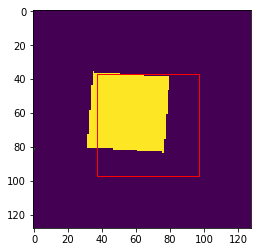

pred box:   variable([[-26.3460083   93.21324158  41.90962219  41.03674316   0.33855659
             0.38339189  -1.68310642]])
gt:  variable([[ 56.          60.          44.          44.           0.06981317
             1.           0.        ]])


 25%|██▍       | 50/201 [00:27<01:24,  1.79it/s]

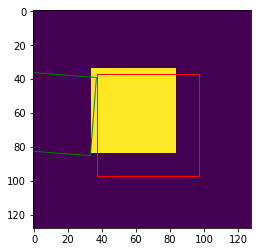

 25%|██▌       | 51/201 [00:28<01:30,  1.65it/s]

pred box:   variable([[ 11.75816345  60.23761749  46.48476028  46.17172623   0.07753171
             0.39058077  -1.68402505]])
gt:  variable([[ 59.  59.  49.  49.   0.   1.   0.]])


 50%|████▉     | 100/201 [00:55<00:56,  1.79it/s]

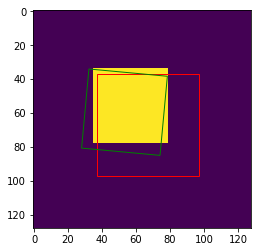

 50%|█████     | 101/201 [00:56<01:00,  1.66it/s]

pred box:   variable([[ 53.23146057  59.43809128  46.37054062  46.77181625   0.09243283
             0.39076522  -1.68761265]])
gt:  variable([[ 57.  56.  43.  43.   0.   1.   0.]])


 75%|███████▍  | 150/201 [01:24<00:28,  1.78it/s]

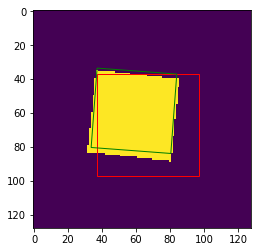

 75%|███████▌  | 151/201 [01:24<00:30,  1.66it/s]

pred box:   variable([[ 58.81789017  58.61220551  47.03479004  46.86470795   0.07497445
             0.39058077  -1.68402505]])
gt:  variable([[ 59.          62.          48.          48.           0.10471976
             1.           0.        ]])


100%|█████████▉| 200/201 [01:53<00:00,  1.75it/s]

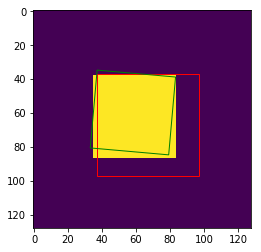

100%|██████████| 201/201 [01:54<00:00,  1.62it/s]

pred box:   variable([[ 58.19522095  59.61459732  46.33935928  45.99300385   0.08791844
             0.39058077  -1.68402505]])
gt:  variable([[ 59.  62.  48.  48.   0.   1.   0.]])


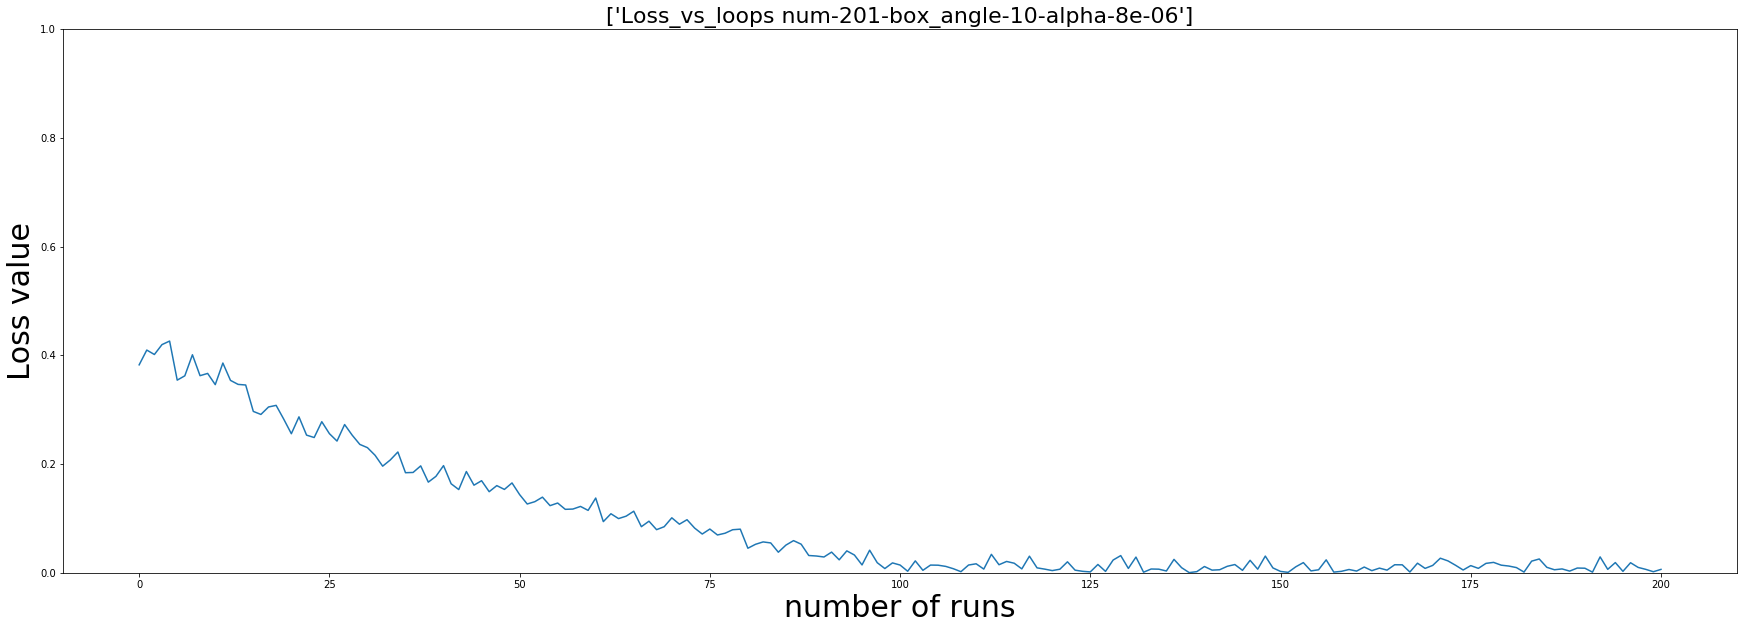

angle 10
test_angles [3, 5, 7, 10]
Angle-  3.0 Width-  55 Height-  55  Position-  55 55


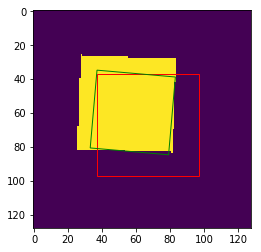

Angle-  5.0 Width-  45 Height-  45  Position-  55 55


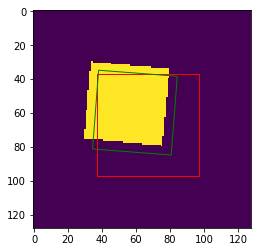

Angle-  7.0 Width-  50 Height-  50  Position-  60 60


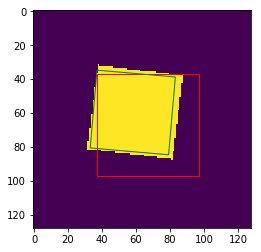

Angle-  10.0 Width-  55 Height-  55  Position-  45 60


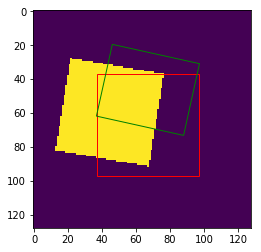

(0,)

In [29]:
"""Main code """
import chainer.cuda as cuda 
all_losses = []

size= 10
nloops= 201
posdiff = 8
alphas = [0.000008,0.001,0.0005,0.0008 ]
angles = [10,20,30,40,50,60,70,80,90]
angles =[10]


for i in range(len(angles)): 
    convnet = ConvNet()   
    convnet.to_gpu(0)
    boxnet = BoxNet(convnet)
    boxnet.to_gpu(0)

    
    # generate random x and y locations
    avg_locx= 55
    avg_locy= 55
    alpha = alphas[i]
    angle = angles[i]
    # generate default box 
    def_boxes = defaultgen(img,fm, 60,60,0.0)
    def_box_index =np.ravel_multi_index((select_index,select_index),(shifts_all.shape[2],shifts_all.shape[3]))
    def_boxes = def_boxes[def_box_index,:]
    def_boxes =def_boxes.reshape([1,1,7])
    def_boxes = def_boxes[0]



    # training network 
    loss_history, pred_boxes, def_boxes, ground_truth, image,boxnet = all_connected(boxnet,angle, avg_locx,
                                                                                    avg_locy,
                                                                                    size,size,
                                                                                    alpha, nloops,
                                                                                    posdiff,def_boxes)
    
    display_loss(loss_history, angle, nloops, alpha )
  
    #test set_parameters 
    
    angles_test =[3,5,7,10,25,45,65]
    widths = [55,45,50,55,45,60,55]
    heights =[55,45,50,55,45,60,55 ] 
    positions=[[55,55],[55,55],[60,60],[45,60],[60,45], [55,55],[40,40]  ]
    
    model = boxnet
    print('angle', angle)
    angles_test_np = np.array(angles_test)
    angles_test_np =angles_test_np[np.where(angles_test_np<angle)] 
    ang = angles_test_np.shape[0]
    
#     for ang in range(len(angles_test_np)-1): 
        
    test_angles= angles_test[0:ang+1] 
    test_widths = widths[0:ang+1]
    test_heights = heights[0:ang+1]
    test_positions =positions[0:ang+1]
    print('test_angles', test_angles)

    
    all_predicted_boxes,all_gts = get_test_results(test_angles, test_widths, test_positions, model,select_index, def_boxes)    
    
    
    
all_losses = np.array(all_losses)
all_losses2 = all_losses.transpose()
all_losses2.shape  



In [30]:
all_predicted_boxes

[variable([[ 58.12628174,  59.60799408,  46.3058548 ,  45.96310043,
              0.08699152,   0.39058077,  -1.68402505]]),
 variable([[ 59.37829971,  59.69752884,  46.43282318,  46.49919891,
              0.07682332,   0.38896373,  -1.66046751]]),
 variable([[ 58.12628174,  59.60799408,  46.3058548 ,  45.96310043,
              0.08699152,   0.39058077,  -1.68402505]]),
 variable([[ 67.05422211,  46.31154251,  52.54001999,  43.24941254,
              0.21780472,   0.23241574,  -1.73947239]])]

In [31]:
all_gts

[variable([[  5.50000000e+01,   5.50000000e+01,   5.50000000e+01,
              5.50000000e+01,   5.23598790e-02,   1.00000000e+00,
              0.00000000e+00]]),
 variable([[ 55.        ,  55.        ,  45.        ,  45.        ,
              0.08726646,   1.        ,   0.        ]]),
 variable([[ 60.        ,  60.        ,  50.        ,  50.        ,
              0.12217305,   1.        ,   0.        ]]),
 variable([[ 45.        ,  60.        ,  55.        ,  55.        ,
              0.17453292,   1.        ,   0.        ]])]

In [32]:
loss_history


[array([ 0.38256139], dtype=float32),
 array([ 0.40973532], dtype=float32),
 array([ 0.40158001], dtype=float32),
 array([ 0.41978329], dtype=float32),
 array([ 0.42629457], dtype=float32),
 array([ 0.35440919], dtype=float32),
 array([ 0.36238378], dtype=float32),
 array([ 0.40110868], dtype=float32),
 array([ 0.36261547], dtype=float32),
 array([ 0.36677524], dtype=float32),
 array([ 0.34617239], dtype=float32),
 array([ 0.38588914], dtype=float32),
 array([ 0.35398626], dtype=float32),
 array([ 0.34659782], dtype=float32),
 array([ 0.34546527], dtype=float32),
 array([ 0.29689866], dtype=float32),
 array([ 0.29131994], dtype=float32),
 array([ 0.305033], dtype=float32),
 array([ 0.3080073], dtype=float32),
 array([ 0.28266868], dtype=float32),
 array([ 0.25585833], dtype=float32),
 array([ 0.28688163], dtype=float32),
 array([ 0.25326186], dtype=float32),
 array([ 0.24884996], dtype=float32),
 array([ 0.27798706], dtype=float32),
 array([ 0.25600383], dtype=float32),
 array([ 0.2423